# KaRMMa Demo

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import karmma
import pickle

/Users/pierfied/opt/anaconda3/envs/karmma/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/pierfied/opt/anaconda3/envs/karmma/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/pierfied/opt/anaconda3/envs/karmma/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered col

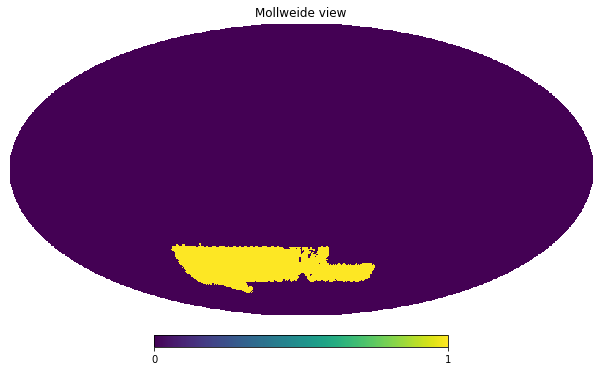

In [2]:
data = pickle.load(open('demo_data.p', 'rb'))

nside = 128
lmax = 256

mask = data['mask']
shift = data['shift']
cl = data['cl']

hp.mollview(mask)

/Users/pierfied/opt/anaconda3/envs/karmma/lib/python3.9/site-packages/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/Users/pierfied/opt/anaconda3/envs/karmma/lib/python3.9/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/Users/pierfied/opt/anaconda3/envs/karmma/lib/python3.9/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(


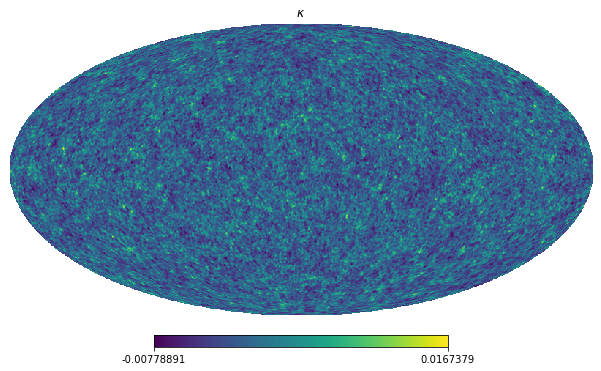

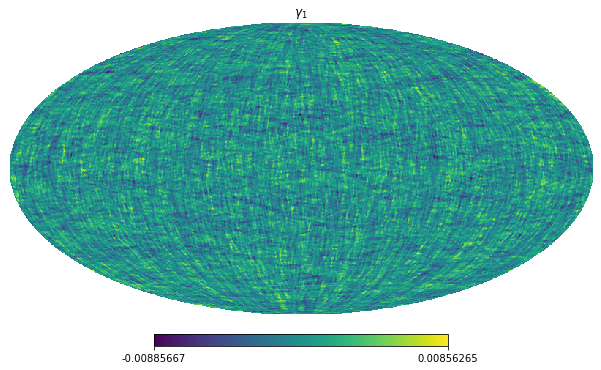

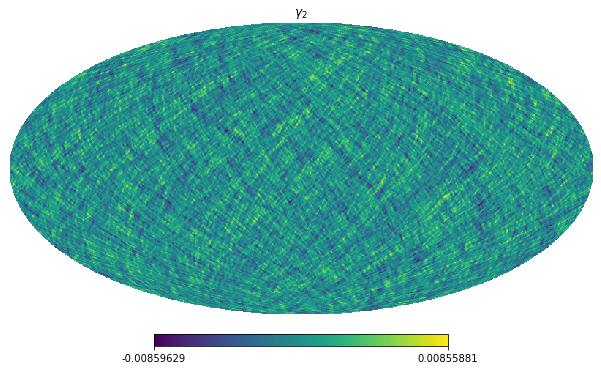

In [3]:
# Apply the pixel window function to the convergence power spectrum.
pw = hp.pixwin(nside, lmax=lmax)
cl_pw = cl * (pw ** 2)

# Compute the power spectrum and mean of the log-convergence field.
gauss_cl = karmma.utils.lognorm_to_gauss_cl(cl_pw, shift, lmax=lmax)
gauss_var = karmma.utils.cl2xi_theta(gauss_cl, 0)
mu = np.log(shift) - 0.5 * gauss_var

# Produce a lognormal mock.
k = np.exp(mu + hp.synfast(gauss_cl, nside)) - shift

# Apply the Kaiser-Squires transformation to get the shear field.
g1, g2 = karmma.utils.conv2shear(k, lmax=lmax)

# Visualize the maps.
hp.mollview(k, title='$\\kappa$')
hp.mollview(g1, title='$\\gamma_1$')
hp.mollview(g2, title='$\\gamma_2$')